# DeepTweets 

## Problem :

The problem we will be exploring is **binary classification**, 
This is because we're going to be using the only **feature** we have  about a tweets which is the **tweettext** to predict whether they are about Politics or Sports.

In a statement,

> Given a tweettext, can we predict whether it is about Politics or Sports ?

## Data :

Looking at the [dataset from Kaggle](https://www.kaggle.com/competitions/deeptweets/data)

There are 3 datasets:
1. **Train.csv** - the training set
2. **Test.csv** - the test set
3. **sample_saubmission.csv** - a sample submission file in the correct format

 There are 3 data fields :
1. **TweetId** - an anonymous id unique to a given tweet
2. **Label** - the associated label which is either Sports or Politics
3. **TweetText** - the text in a tweet


## Evaluation :

For this problem, [Kaggle has set the evaluation metric to being classification accuracy](https://www.kaggle.com/competitions/deeptweets/overview/evaluation). As with many classification evaluations, the goal will be to get this value as high as possible.

 Based on the competition leaderboard the score of the top 10 submissions is around 93% so :
 
 > My objectif is to reach 94% accuracy at predicting whether or not a tweet is about Politics or Sports 



### Tools

In this project I'm going to use the regular EDA and plotting libraries  :

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

## EDA

#### Importing the most cummon EDA libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
## load the data
df= pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [5]:
df.isna().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

 good, there is no missing values in our data set!

In [6]:
df.Label.value_counts()

Sports      3325
Politics    3200
Name: Label, dtype: int64

Since these two values are close to even, our Label column can be considered balanced.

<AxesSubplot:>

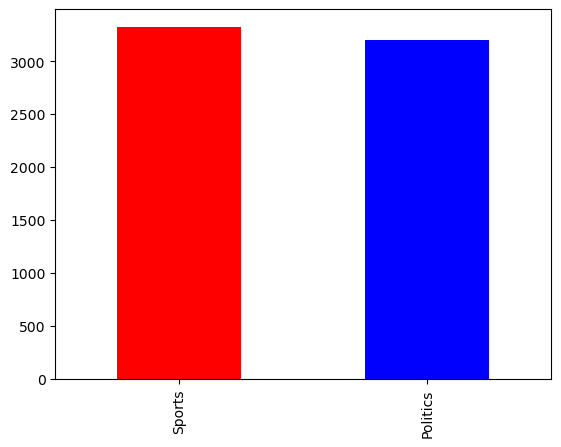

In [7]:
df.Label.value_counts().plot(kind='bar', color=['red','blue'])

In [8]:
df.head(10)

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
5,306713195832307712,Politics,'Dr. Rajan: Fiscal consolidation will create m...
6,306100962337112064,Politics,"FACT: More than 800,000 defense employees will..."
7,305951758759366657,Sports,"'1st Test. Over 39: 0 runs, 1 wkt (M Wade 0, M..."
8,304482567158104065,Sports,Some of Africa's top teams will try and take a...
9,303806584964935680,Sports,'Can you beat the tweet of @RoryGribbell and z...


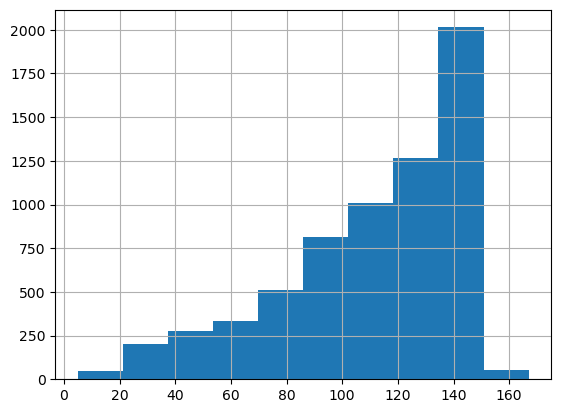

In [9]:
#len of tweet texts
df['TweetText'].str.len().hist();

Stop words are words like a, an, the, is, has, of, are etc.
Most of the times they add noise to the features. 
Therefore removing stop words helps build cleaner dataset with better features for machine learning model.

Let's explore the distribution of stop words in tweet texts using the function `stopword_distribution()` 

C:\Users\annou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


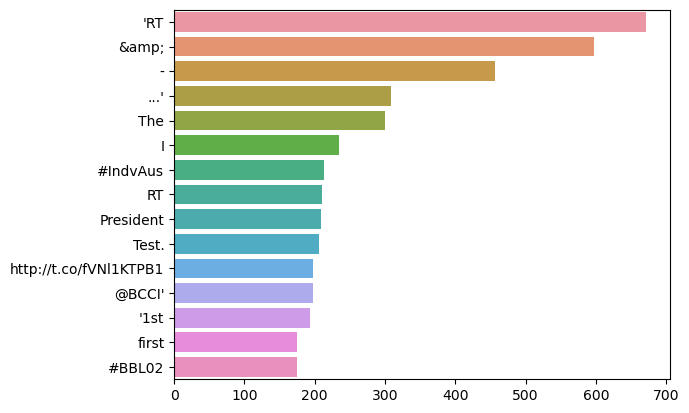

In [14]:
from nltk.corpus import stopwords
from collections import Counter

def stopword_distribution (text):
    stopword= set(stopwords.words('english'))
    tokens = text.str.split().values.tolist()
    corpus = [word for sublist in tokens for word in sublist]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word,count in most[:50]:
        if word not in stopword:
            x.append(count)
            y.append(word)
    return x,y
    
    
x,y=stopword_distribution(df['TweetText'])
sn.barplot(x, y);

## Feature Engineering

In [15]:
df.head(10)

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
5,306713195832307712,Politics,'Dr. Rajan: Fiscal consolidation will create m...
6,306100962337112064,Politics,"FACT: More than 800,000 defense employees will..."
7,305951758759366657,Sports,"'1st Test. Over 39: 0 runs, 1 wkt (M Wade 0, M..."
8,304482567158104065,Sports,Some of Africa's top teams will try and take a...
9,303806584964935680,Sports,'Can you beat the tweet of @RoryGribbell and z...


Now we have to clean our data, so we have to remove :

    -punctuations
    -stopwords
    -usernames
    -duplicates
    
For that we're going to use one function `text_cleaner()`

In [19]:
import re
import string
def text_cleaner(text):
    """
    clleaning function
    """
    x,y=stopword_distribution(df['TweetText'])
    punctuation = '&~"{(}-|`_\^*%!§;:,?,<>$£=+)'

    #punctuations
    text = re.sub(r'[^\w\s]','', text).lower()
    
    #  urls
    text = re.sub('https', '', text, flags=re.MULTILINE)
    
    words = [w for w in text.split(" ") if len(w)>1]
    #stop words
    words = [w for w in words if w not in y]
    
    #duplicates
    words = set(words)
    
    #usernames
    words = [w for w in words if w[0] != "@"]
    
    return words

def text_cleaner_apply(text):
    
    text = text.apply(lambda text: text_cleaner(text))
    
    # join the words in a sentence
    clean_text = text.copy(deep=True)
    for i in range(clean_text.shape[0]):
        clean_text[i] = " ".join(text[i])
        
    return clean_text


In [20]:
df["TweetText"] = text_cleaner_apply(df["TweetText"])
df.head(10)

,TweetId,Label,TweetText
0,304271250237304833,Politics,seckerry value measured deepest terms values i...
1,304834304222064640,Politics,rraina1481 so fear
2,303568995880144898,Sports,wwc13 australia video between highlights watch...
3,304366580664528896,Sports,chadwickmodels cantwaitforausgp albertpark cir...
4,296770931098009601,Sports,feedback thanks thing cricketfox the for good ...
5,306713195832307712,Politics,fiscal consolidation rajan will space more for...
6,306100962337112064,Politics,spending will fact impending to jobsnotcuts do...
7,305951758759366657,Sports,wkt 24 1st indvaus test 1014 aus 39 runs wade ...
8,304482567158104065,Sports,will of step to and top some take httptcojruuv...
9,303806584964935680,Sports,tweet halted play zebras of beat club and you ...


Also we're going to turn Labels into categorical data

In [21]:
cat = {"Label":     {"Politics": 0, "Sports": 1}}
df = df.replace(cat)

In [22]:
df.head(10)

,TweetId,Label,TweetText
0,304271250237304833,0,seckerry value measured deepest terms values i...
1,304834304222064640,0,rraina1481 so fear
2,303568995880144898,1,wwc13 australia video between highlights watch...
3,304366580664528896,1,chadwickmodels cantwaitforausgp albertpark cir...
4,296770931098009601,1,feedback thanks thing cricketfox the for good ...
5,306713195832307712,0,fiscal consolidation rajan will space more for...
6,306100962337112064,0,spending will fact impending to jobsnotcuts do...
7,305951758759366657,1,wkt 24 1st indvaus test 1014 aus 39 runs wade ...
8,304482567158104065,1,will of step to and top some take httptcojruuv...
9,303806584964935680,1,tweet halted play zebras of beat club and you ...


In [6]:
# save the cleaned data
df.to_csv("trainCleaned.csv", index=False)

NameError: name 'df' is not defined

Good, now our data is ready for training

## Modeling

As have in total around ~9000 samples.

We'll be using the following models and we'll compare their results :

    -LinearSVC 
    -K-Nearest Neighbors 
    -SGDClassifier
    -RidgeClassifier 
    -SVC
    -RandomForestClassifier
    -GradientBoostingClassifier
    -LogisticRegression
    -BaggingClassifier
    -Perceptron

In [4]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier , LogisticRegression ,Perceptron ,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , BaggingClassifier

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer

from sklearn.model_selection import train_test_split

### Training the models 

We're going to use a function to train all the models on our training data set

In [7]:
train= pd.read_csv('trainCleaned.csv')

X_train, X_valid, y_train, y_valid = train_test_split(train["TweetText"], train["Label"], test_size=0.2, random_state=42, shuffle=True)



In [163]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SGDClassifier": SGDClassifier(),
          "SVC": SVC(),
          "RidgeClassifier":RidgeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "Logistic Regression": LogisticRegression(),
          "BaggingClassifier": BaggingClassifier(),
          "Perceptron": Perceptron() }

In [154]:
def fit_and_score(models, X_train, X_valid, y_train, y_valid, verbose = True):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with validation data
    """
    
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        lr = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('lr', model)])
        lr.fit(X_train, y_train)
        valid_predict = lr.predict(X_valid)
        lr_tra = lr.score(X_train,y_train)
        mod_ta = accuracy_score(valid_predict, y_valid)
        model_scores[name] = mod_ta
    return model_scores

In [174]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

C:\Users\annou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'LinearSVC': 0.9563218390804598,
 'KNN': 0.9279693486590038,
 'SGDClassifier': 0.9509578544061302,
 'SVC': 0.9509578544061302,
 'RidgeClassifier': 0.9555555555555556,
 'Random Forest': 0.9172413793103448,
 'GradientBoostingClassifier': 0.8199233716475096,
 'Logistic Regression': 0.9425287356321839,
 'BaggingClassifier': 0.8919540229885058,
 'Perceptron': 0.9295019157088122}

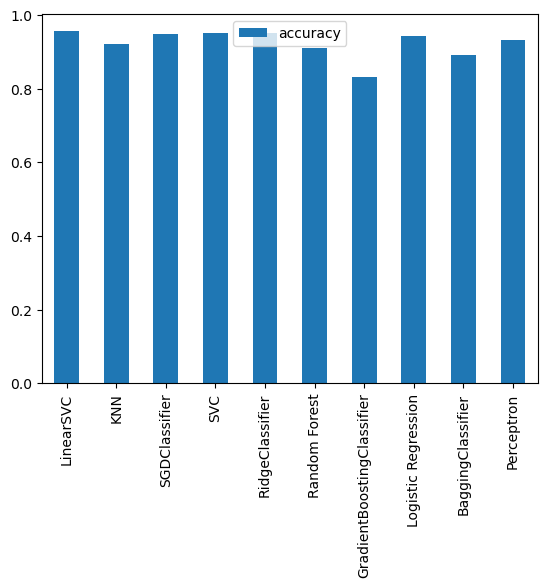

In [165]:
model_compare= pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

It seems that the LinearSVC has the highest accuracy score, now we're going to tune the model

### Hyperparameter tuning with GridSearchCV

In [3]:
from sklearn.model_selection import GridSearchCV
model= LinearSVC()
model.get_params()

NameError: name 'LinearSVC' is not defined

In [173]:
np.random.seed(42)

param_grid = {'C': [0.1, 1, 10],
              'loss': ['hinge', 'squared_hinge'],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'dual': [True, False],
              'tol': [1e-5, 1e-4, 1e-3],
              'max_iter': [100, 500, 1000]}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type

0.9563218390804598

In [176]:
grid_search.best_params_

{'C': 1,
 'dual': True,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'penalty': 'l2',
 'tol': 1e-05}

In [181]:
model_best_params=LinearSVC(C= 1,
 dual= True,
 loss='squared_hinge',
 max_iter= 100,
 penalty ='l2',
 tol= 1e-05)

In [189]:
#train the model with the best hyperparameters
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', model_best_params)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('grid_search', LinearSVC(C=1, max_iter=100, tol=1e-05))])

In [183]:
pipeline.score(X_valid, y_valid)

0.9563218390804598

### Preprocessing the data

Now we have to use prediction on the test data set and export the results in the same format as `sample_submission.csv`

In [225]:
test_data= pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    2610 non-null   int64 
 1   TweetText  2610 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.9+ KB


In [196]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', model_best_params)])
pipeline.fit(X_train, y_train)
test_predictions=pipeline.predict(test_data['TweetText'])

In [204]:
submission=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission = submission.replace(cat)

In [205]:
submission.head()

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Politics
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports


In [228]:
#let's see for example what is the tweet 294826406272188416 about
label_value = submission.loc[submission['TweetId'] == 294826406272188416, 'Label'].values[0]

print(label_value)

Politics


Let's now export our predictions DataFrame to CSV so we can submit it to Kaggle.

In [229]:
submission.to_csv('ama_submission.csv', index=False)

According to Kaggle we got  0.83524 which puts up in the 194th place so far.

Let's see if we can impove the result; a score around 0.9 would be greate.

According to the results we got earlier on the models that got the highest accuracy score, we're going to tune all the model's hyperparameters and see if we got any improvements. Otherwise, we might re-clean the data and see where the problem is.

#### Tunning KNN with GridSearchCV

In [10]:
np.random.seed(42)
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'metric': ['minkowski', 'manhattan', 'chebyshev'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

KeyboardInterrupt: 

In [13]:
pipeline.best_params_

AttributeError: 'Pipeline' object has no attribute 'best_params_'

#### Tunning SGDClassifier with CridSearchCV

In [14]:
np.random.seed(42)
sgd = SGDClassifier()

# Define the hyperparameters to tune
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-5, 1e-6],
    'n_jobs': [-1]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_mo

0.9547892720306513

In [16]:
grid_search.best_params_

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 10000,
 'n_jobs': -1,
 'penalty': 'l2',
 'tol': 1e-05}

In [17]:
model2_best_params=SGDClassifier(alpha= 0.0001,
 loss ='modified_huber',
 max_iter= 10000,
 n_jobs= -1,
 penalty= 'l2',
 tol= 1e-05)

Well this is seems to be a good one let's try and see .

In [19]:
test_data= pd.read_csv('test.csv')
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', model2_best_params)])
pipeline.fit(X_train, y_train)
test_predictions=pipeline.predict(test_data['TweetText'])
submission_2=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_2 = submission_2.replace(cat)
submission_2.to_csv('submission_v2.csv', index=False)

unfortunatly we had lower score than the last time.
Let's tru another model

#### Tunning RidgeClassifier with GridSearchCV

In [20]:
np.random.seed(42)

ridge = RidgeClassifier()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='accuracy')
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default beh

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  w

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not sta

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse in

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to n

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not sta

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default beh

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not sta

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default beh

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

0.9586206896551724

In [21]:
grid_search.best_params_

{'alpha': 1.0, 'fit_intercept': True, 'normalize': True, 'solver': 'auto'}

In [22]:
model3_best_params=RidgeClassifier(
    alpha=1.0,
    fit_intercept=True,
    normalize=True,
    solver= 'auto'
)

In [23]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', model2_best_params)])
pipeline.fit(X_train, y_train)
test_predictions=pipeline.predict(test_data['TweetText'])
submission_3=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_3 = submission_3.replace(cat)
submission_3.to_csv('submission_v3.csv', index=False)

we got 0.83141, let's fit the model on the whote train data set provided by kaggle and see if we missed something

In [24]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', model2_best_params)])
pipeline.fit(train["TweetText"], train["Label"])
test_predictions=pipeline.predict(test_data['TweetText'])
submission_3_upd=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_3_upd = submission_3_upd.replace(cat)
submission_3_upd.to_csv('submission_v3_upd.csv', index=False)

Good, we got 0.87611, the problem was the fact that we fit the models on the train data after the split, wich affected the performance on the model.

The right thing to do before moving on is to do fit the LinearSVC model on the whole training data set and see what we'll got.

#### recap

In [31]:
np.random.seed(42)
LSVC= LinearSVC()
param_grid = {'C': [0.1, 1, 10],
              'loss': ['hinge', 'squared_hinge'],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'dual': [True, False],
              'tol': [1e-5, 1e-4, 1e-3],
              'max_iter': [100, 500, 1000]}
grid_search = GridSearchCV(LSVC, param_grid=param_grid, cv=5, n_jobs=-1)
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\annou\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type

0.9563218390804598

In [33]:
grid_search.best_params_

{'C': 1,
 'dual': True,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'penalty': 'l2',
 'tol': 1e-05}

In [34]:
LSVC_best_params=LinearSVC(C= 1,
 dual= True,
 loss='squared_hinge',
 max_iter= 100,
 penalty ='l2',
 tol= 1e-05)

In [36]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', LSVC_best_params)])
pipeline.fit(train["TweetText"], train["Label"])
test_predictions=pipeline.predict(test_data['TweetText'])
submission_3_upd=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_3_upd = submission_3_upd.replace(cat)
submission_3_upd.to_csv('submission_v11_upd.csv', index=False)

We got 0.85951, so our best model so far is RidgeClassifier()

#### Tuning Logistic Regression with GridSearchCV

In [38]:
np.random.seed(42)
lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000]
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

0.9517241379310345

In [39]:
grid_search.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}

In [41]:
lr_best_params = LogisticRegression(
        C= 0.001, 
    max_iter= 100, 
    penalty= 'none',
    solver= 'saga'
)

In [42]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', lr_best_params)])
pipeline.fit(train["TweetText"], train["Label"])
test_predictions=pipeline.predict(test_data['TweetText'])
submission_4=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_4 = submission_4.replace(cat)
submission_4.to_csv('submission_v4.csv', index=False)

C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annou\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Tuning RandomForestClassifier with GridSearchCV

In [43]:
np.random.seed(42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

0.9195402298850575

In [44]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [48]:
rf_best_params= RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    bootstrap=True
)

In [49]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', rf_best_params)])
pipeline.fit(train["TweetText"], train["Label"])
test_predictions=pipeline.predict(test_data['TweetText'])
submission_5=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_5 = submission_5.replace(cat)
submission_5.to_csv('submission_v5.csv', index=False)

The model didn't perform well , we got 0.83014

After doing some research I find out that naive bayes model could be a good choice. Let's find out

In [54]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.4, 0.6], [0.6, 0.4]]
}

nb = MultinomialNB()

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5)
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', grid_search)])
pipeline.fit(X_train, y_train)
valid_predict = pipeline.predict(X_valid)
accuracy_score(valid_predict, y_valid)

0.9693486590038314

In [51]:
grid_search.best_params_

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

In [52]:
nb_best_params = MultinomialNB(alpha= 0.1, class_prior=None, fit_prior= True)

In [55]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                             ('grid_search', nb_best_params)])
pipeline.fit(train["TweetText"], train["Label"])
test_predictions=pipeline.predict(test_data['TweetText'])
submission_6_up=pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_predictions})
cat = {"Label":     {0: "Politics" ,1: "Sports"}}
submission_6_up = submission_6_up.replace(cat)
submission_6_up.to_csv('submission_v6_up.csv', index=False)

We got 0.90804 wich means that naive bayes is the best choice for our case.

The reason why it worked very well is that Naive Bayes is a powerful and often efficient algorithm for text classification tasks, especially when dealing with relatively small datasets like ours. It's also relatively fast to train and make predictions, which can be an advantage in some applications.